In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img


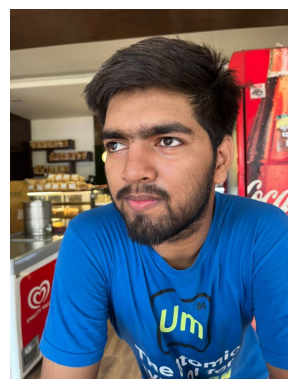

In [38]:
filename="/content/1000001524.jpg"
img= read_file(filename)
orgimage=img.copy()



In [39]:
#create edges
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    line_size = max(3, line_size + (line_size % 2))
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

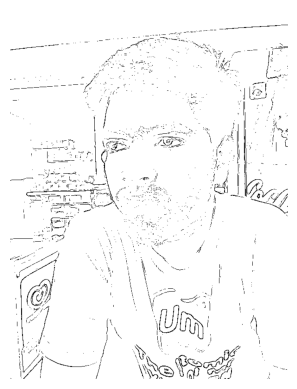

In [40]:
line_size, blur_value=2,5

edges=edge_mask(img,line_size, blur_value)
plt.imshow(edges,cmap="gray")
plt.axis("off")
plt.show()

In [41]:
#reduce colour palatte
def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

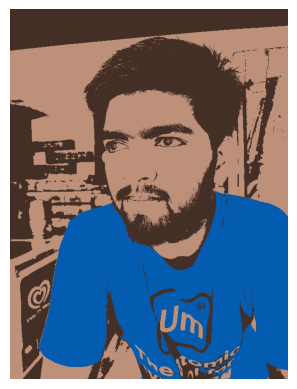

In [42]:
img_quantize =color_quantization(img, k=3)
plt.imshow(img_quantize )
plt.axis("off")
plt.show()

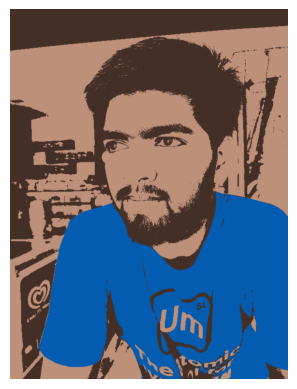

In [43]:
#reduce noise
blurred=cv2.bilateralFilter(img_quantize, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.axis("off")
plt.show()



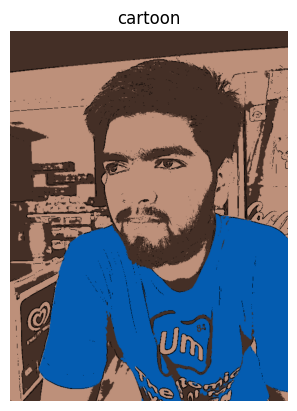

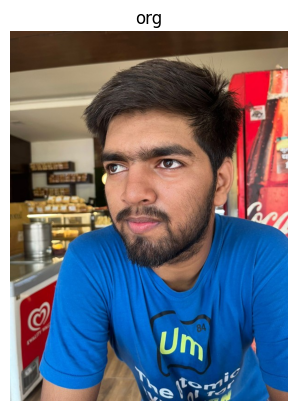

In [44]:
def cartoon(blurred): # Add blurred as an argument
  c=cv2.bitwise_and(blurred, blurred, mask =edges)
  plt.imshow(c)
  plt.title("cartoon")
  plt.axis("off")
  plt.show()
  plt.imshow(orgimage)
  plt.title("org")
  plt.axis("off")
  plt.show()


cartoon(blurred)